### 1. Code summarising results of 1st set of experiments (section 6.2.1)

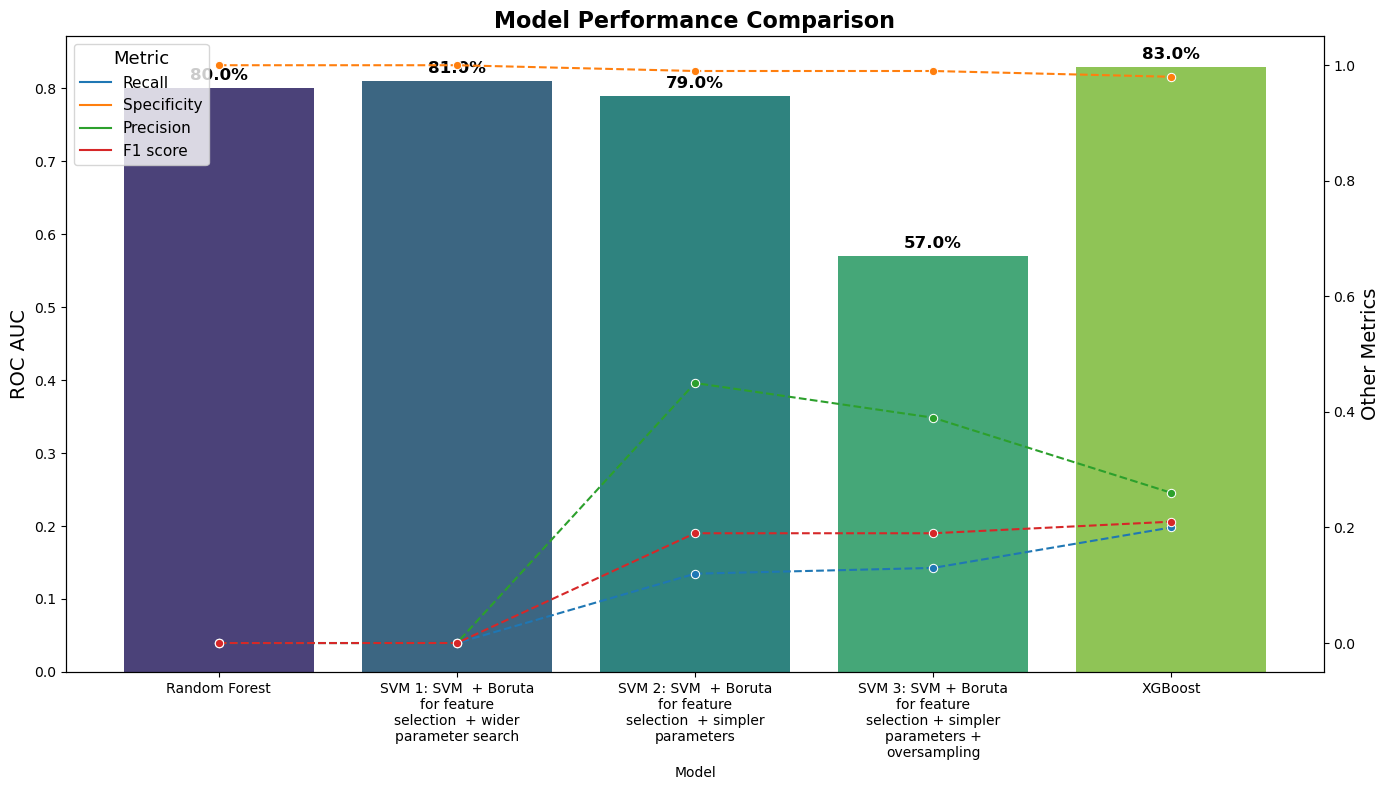

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data
data = {
    "Metric": ["ROC AUC", "Recall", "Specificity",  "Precision", "F1 score"],
    "Random Forest": [0.8, 0, 1, 0, 0],
    "SVM 1: SVM  + Boruta for feature selection  + wider parameter search": [0.81, 0, 1, 0, 0],
    "SVM 2: SVM  + Boruta for feature selection  + simpler parameters": [0.79, 0.12, 0.99, 0.45, 0.19],
    "SVM 3: SVM + Boruta for feature selection + simpler parameters + oversampling": [0.57, 0.13, 0.99, 0.39, 0.19],
    "XGBoost": [0.83, 0.2, 0.98, 0.26, 0.21]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

# Separate data for bar and line plots
df_bar = df_melted[df_melted['Metric'] == 'ROC AUC']
df_line = df_melted[df_melted['Metric'].isin(['Recall', 'Specificity', 'Precision', 'F1 score'])]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar for ROC AUC
bar_plot = sns.barplot(data=df_bar, x="Model", y="Value", ax=ax1, palette="viridis")

# Annotate bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Create second y-axis for line plot
ax2 = ax1.twinx()

# Plot line for Recall, Specificity, and F1 score
sns.lineplot(data=df_line, x="Model", y="Value", hue="Metric", marker='o', ax=ax2, linestyle='--')

# Add titles and labels
ax1.set_title("Model Performance Comparison", fontsize=16, fontweight='bold')
#ax1.set_xlabel("Machine learning classifiers", fontsize=14)
ax1.set_ylabel("ROC AUC", fontsize=14)
ax2.set_ylabel("Other Metrics", fontsize=14)

# Wrap x-axis labels for better readability
labels = [textwrap.fill(label.get_text(), 20) for label in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=0, ha='center', fontsize=10)

# Customize legend
ax2.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### 2. Code with summary of results of the second set of experiments (section 6.2.2)

### - Overall dementia prediction 

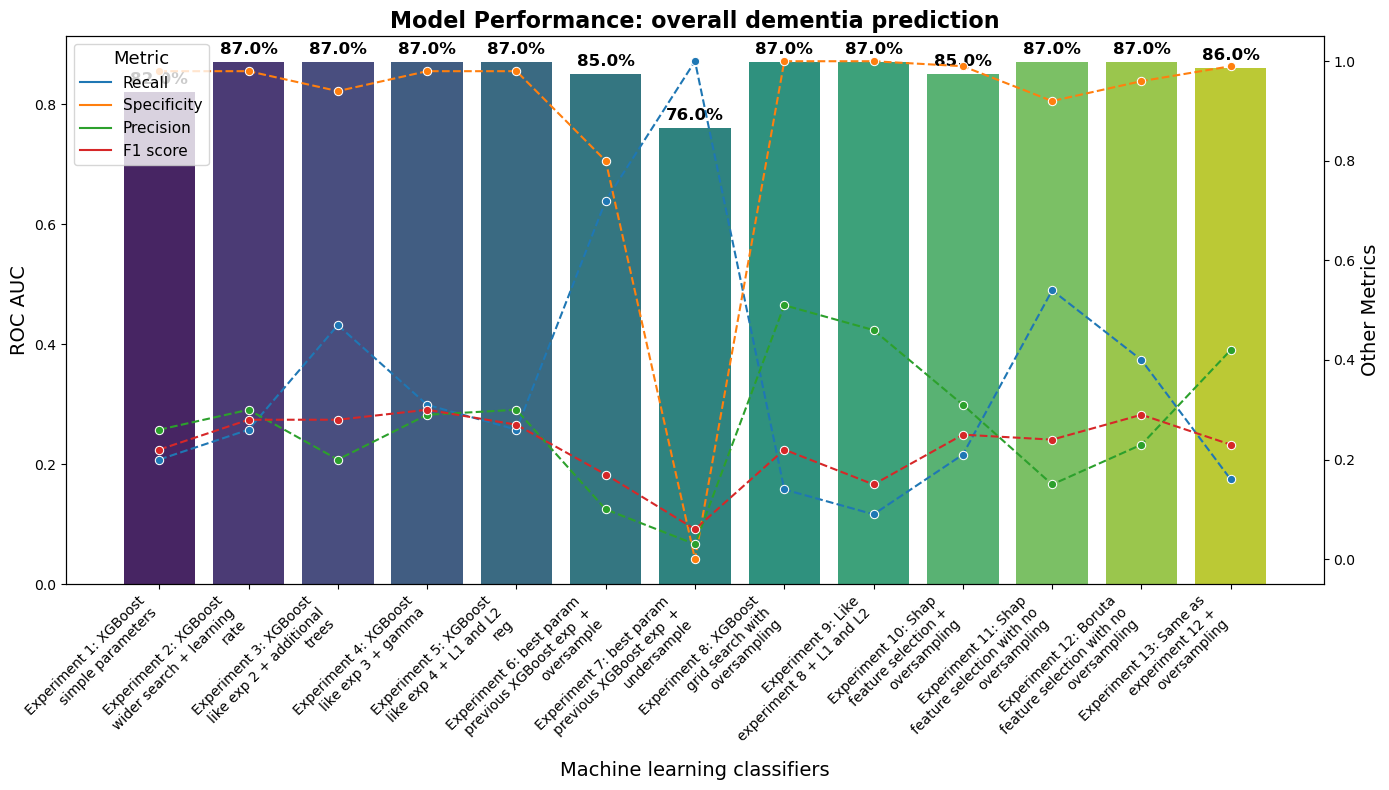

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data
data = {
    "Metric": ["ROC AUC", "Recall", "Specificity", "Precision", "F1 score"],
    "Experiment 1: XGBoost simple parameters": [0.82, 0.2, 0.98, 0.26, 0.22],
    "Experiment 2: XGBoost wider search + learning rate": [0.87, 0.26, 0.98, 0.3, 0.28],
    "Experiment 3: XGBoost like exp 2 + additional trees": [0.87, 0.47, 0.94, 0.2, 0.28],
    "Experiment 4: XGBoost like exp 3 + gamma": [0.87, 0.31, 0.98, 0.29, 0.3],
    "Experiment 5: XGBoost like exp 4 + L1 and L2 reg": [0.87, 0.26, 0.98, 0.3, 0.27],
    "Experiment 6: best param previous XGBoost exp  + oversample": [0.85, 0.72, 0.8, 0.1, 0.17],
    "Experiment 7: best param previous XGBoost exp  + undersample": [0.76, 1, 0, 0.03, 0.06],
    "Experiment 8: XGBoost grid search with oversampling": [0.87, 0.14, 1, 0.51, 0.22],
    "Experiment 9: Like experiment 8 + L1 and L2": [0.87, 0.09, 1, 0.46, 0.15],
    "Experiment 10: Shap feature selection + oversampling": [0.85, 0.21, 0.99, 0.31, 0.25],
    "Experiment 11: Shap feature selection with no oversampling": [0.87, 0.54, 0.92, 0.15, 0.24],
    "Experiment 12: Boruta feature selection with no oversampling": [0.87, 0.4, 0.96, 0.23, 0.29],
    "Experiment 13: Same as experiment 12 + oversampling ": [0.86, 0.16, 0.99, 0.42, 0.23]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

# Separate data for bar and line plots
df_bar = df_melted[df_melted['Metric'] == 'ROC AUC']
df_line = df_melted[df_melted['Metric'].isin(['Recall', 'Specificity', 'Precision', 'F1 score'])]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar for ROC AUC
bar_plot = sns.barplot(data=df_bar, x="Model", y="Value", ax=ax1, palette="viridis")

# Annotate bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Create second y-axis for line plot
ax2 = ax1.twinx()

# Plot line for Recall, Specificity, and F1 score
sns.lineplot(data=df_line, x="Model", y="Value", hue="Metric", marker='o', ax=ax2, linestyle='--')

# Add titles and labels
ax1.set_title("Model Performance: overall dementia prediction", fontsize=16, fontweight='bold')
ax1.set_xlabel("Machine learning classifiers", fontsize=14)
ax1.set_ylabel("ROC AUC", fontsize=14)
ax2.set_ylabel("Other Metrics", fontsize=14)

# Wrap x-axis labels for better readability
labels = [textwrap.fill(label.get_text(), 25) for label in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Customize legend
ax2.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### - Overall dementia prediction excluding age and no apoe4 alleles

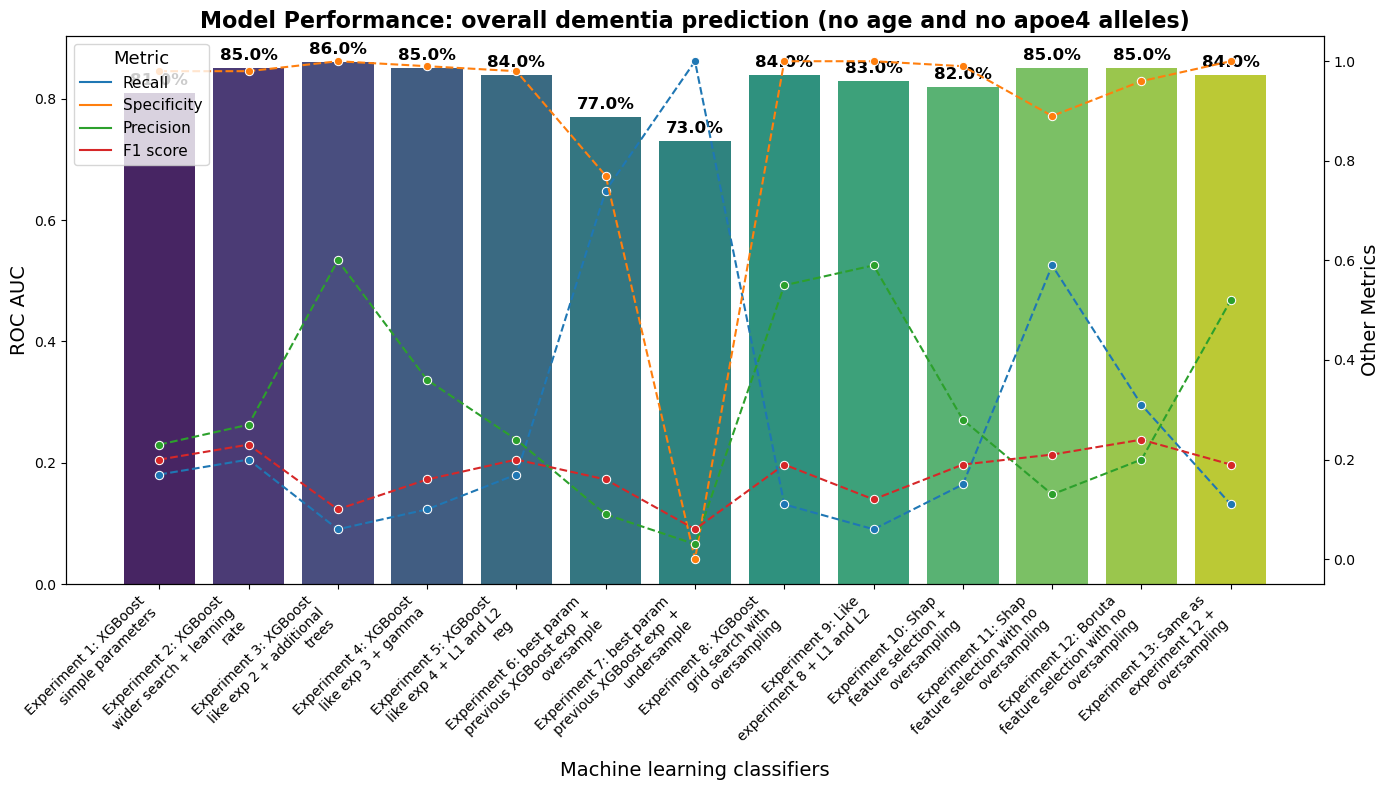

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data
data = {
    "Metric": ["ROC AUC", "Recall", "Specificity", "Precision", "F1 score"],
    "Experiment 1: XGBoost simple parameters": [0.81, 0.17, 0.98, 0.23, 0.2],
    "Experiment 2: XGBoost wider search + learning rate": [0.85, 0.2, 0.98, 0.27, 0.23],
    "Experiment 3: XGBoost like exp 2 + additional trees": [0.86, 0.06, 1, 0.6, 0.1],
    "Experiment 4: XGBoost like exp 3 + gamma": [0.85, 0.1, 0.99, 0.36, 0.16],
    "Experiment 5: XGBoost like exp 4 + L1 and L2 reg": [0.84, 0.17, 0.98, 0.24, 0.2],
    "Experiment 6: best param previous XGBoost exp  + oversample": [0.77, 0.74, 0.77, 0.09, 0.16],
    "Experiment 7: best param previous XGBoost exp  + undersample": [0.73, 1, 0, 0.03, 0.06],
    "Experiment 8: XGBoost grid search with oversampling": [0.84, 0.11, 1, 0.55, 0.19],
    "Experiment 9: Like experiment 8 + L1 and L2": [0.83, 0.06, 1, 0.59, 0.12],
    "Experiment 10: Shap feature selection + oversampling": [0.82, 0.15, 0.99, 0.28, 0.19],
    "Experiment 11: Shap feature selection with no oversampling": [0.85, 0.59, 0.89, 0.13, 0.21],
    "Experiment 12: Boruta feature selection with no oversampling": [0.85, 0.31, 0.96, 0.2, 0.24],
    "Experiment 13: Same as experiment 12 + oversampling ": [0.84, 0.11, 1, 0.52, 0.19]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

# Separate data for bar and line plots
df_bar = df_melted[df_melted['Metric'] == 'ROC AUC']
df_line = df_melted[df_melted['Metric'].isin(['Recall', 'Specificity', 'Precision', 'F1 score'])]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar for ROC AUC
bar_plot = sns.barplot(data=df_bar, x="Model", y="Value", ax=ax1, palette="viridis")

# Annotate bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Create second y-axis for line plot
ax2 = ax1.twinx()

# Plot line for Recall, Specificity, and F1 score
sns.lineplot(data=df_line, x="Model", y="Value", hue="Metric", marker='o', ax=ax2, linestyle='--')

# Add titles and labels
ax1.set_title("Model Performance: overall dementia prediction (no age and no apoe4 alleles)", fontsize=16, fontweight='bold')
ax1.set_xlabel("Machine learning classifiers", fontsize=14)
ax1.set_ylabel("ROC AUC", fontsize=14)
ax2.set_ylabel("Other Metrics", fontsize=14)

# Wrap x-axis labels for better readability
labels = [textwrap.fill(label.get_text(), 25) for label in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Customize legend
ax2.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### - Prediction of dementia 5 to 10 years from baseline 

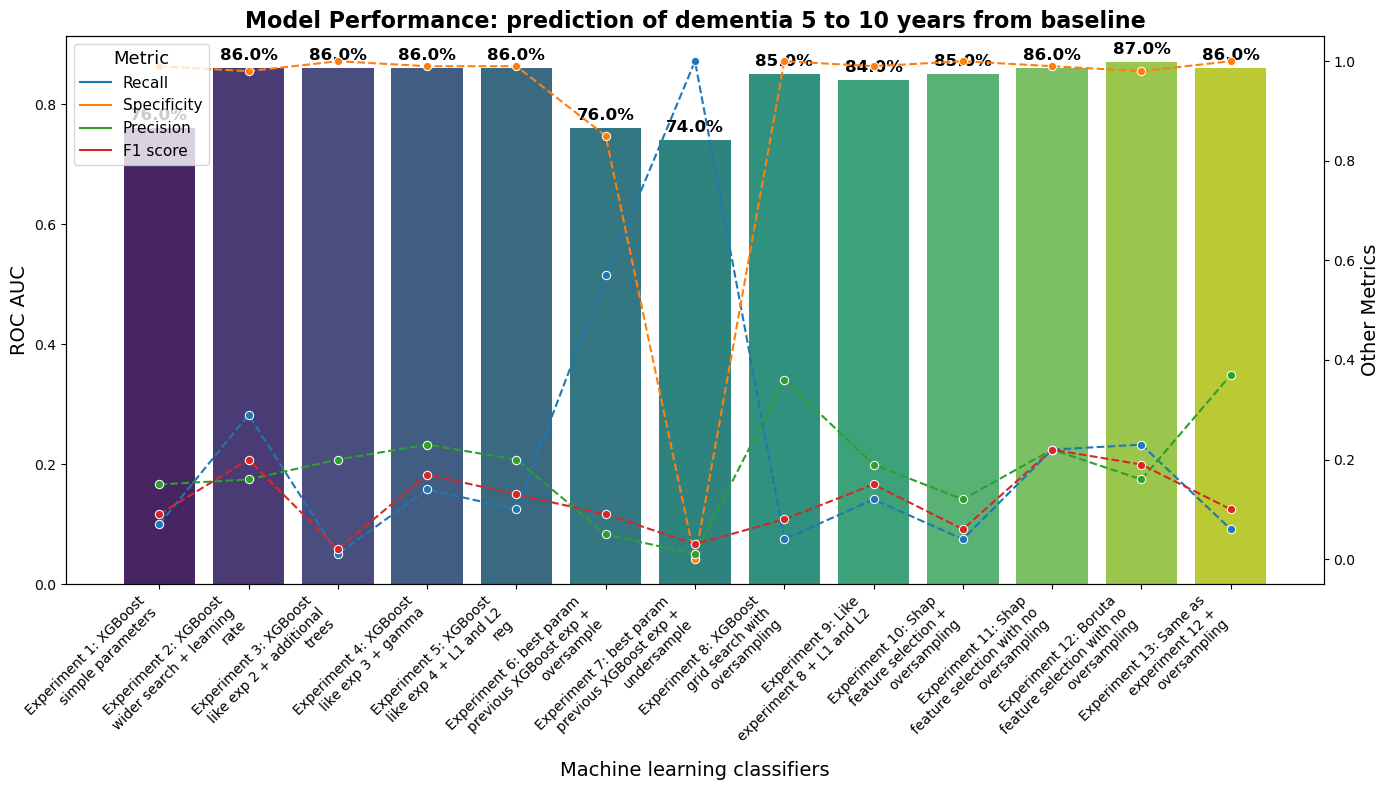

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data
# Data
data = {
    "Metric": ["ROC AUC", "Recall", "Specificity", "Precision", "F1 score"],
    "Experiment 1: XGBoost simple parameters": [0.76, 0.07, 0.99, 0.15, 0.09],
    "Experiment 2: XGBoost wider search + learning rate": [0.86, 0.29, 0.98, 0.16, 0.2],
    "Experiment 3: XGBoost like exp 2 + additional trees": [0.86, 0.01, 1, 0.2, 0.02],
    "Experiment 4: XGBoost like exp 3 + gamma": [0.86, 0.14, 0.99, 0.23, 0.17],
    "Experiment 5: XGBoost like exp 4 + L1 and L2 reg": [0.86, 0.1, 0.99, 0.2, 0.13],
    "Experiment 6: best param previous XGBoost exp + oversample": [0.76, 0.57, 0.85, 0.05, 0.09],
    "Experiment 7: best param previous XGBoost exp + undersample": [0.74, 1, 0, 0.01, 0.03],
    "Experiment 8: XGBoost grid search with oversampling": [0.85, 0.04, 1, 0.36, 0.08],
    "Experiment 9: Like experiment 8 + L1 and L2": [0.84, 0.12, 0.99, 0.19, 0.15],
    "Experiment 10: Shap feature selection + oversampling": [0.85, 0.04, 1, 0.12, 0.06],
    "Experiment 11: Shap feature selection with no oversampling": [0.86, 0.22, 0.99, 0.22, 0.22],
    "Experiment 12: Boruta feature selection with no oversampling": [0.87, 0.23, 0.98, 0.16, 0.19],
    "Experiment 13: Same as experiment 12 + oversampling ": [0.86, 0.06, 1, 0.37, 0.1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

# Separate data for bar and line plots
df_bar = df_melted[df_melted['Metric'] == 'ROC AUC']
df_line = df_melted[df_melted['Metric'].isin(['Recall', 'Specificity', 'Precision', 'F1 score'])]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar for ROC AUC
bar_plot = sns.barplot(data=df_bar, x="Model", y="Value", ax=ax1, palette="viridis")

# Annotate bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Create second y-axis for line plot
ax2 = ax1.twinx()

# Plot line for Recall, Specificity, and F1 score
sns.lineplot(data=df_line, x="Model", y="Value", hue="Metric", marker='o', ax=ax2, linestyle='--')

# Add titles and labels
ax1.set_title("Model Performance: prediction of dementia 5 to 10 years from baseline", fontsize=16, fontweight='bold')
ax1.set_xlabel("Machine learning classifiers", fontsize=14)
ax1.set_ylabel("ROC AUC", fontsize=14)
ax2.set_ylabel("Other Metrics", fontsize=14)

# Wrap x-axis labels for better readability
labels = [textwrap.fill(label.get_text(), 25) for label in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Customize legend
ax2.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### - Prediction of dementia 5 to 10 years from baseline (excluding age and apoe4 alleles)

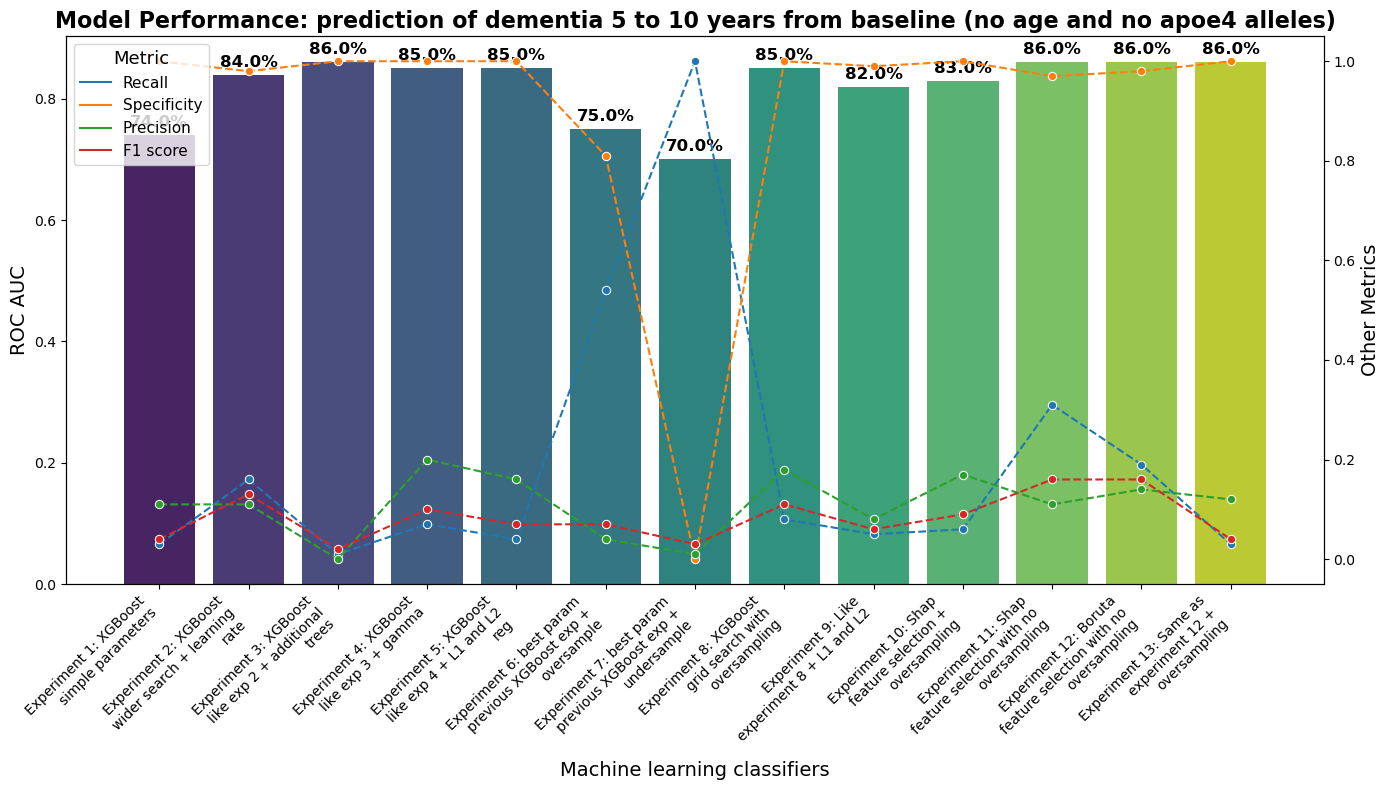

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data
data = {
    "Metric": ["ROC AUC", "Recall", "Specificity", "Precision", "F1 score"],
    "Experiment 1: XGBoost simple parameters": [0.74, 0.03, 1, 0.11, 0.04],
    "Experiment 2: XGBoost wider search + learning rate": [0.84, 0.16, 0.98, 0.11, 0.13],
    "Experiment 3: XGBoost like exp 2 + additional trees": [0.86, 0.01, 1, 0, 0.02],
    "Experiment 4: XGBoost like exp 3 + gamma": [0.85, 0.07, 1, 0.2, 0.1],
    "Experiment 5: XGBoost like exp 4 + L1 and L2 reg": [0.85, 0.04, 1, 0.16, 0.07],
    "Experiment 6: best param previous XGBoost exp + oversample": [0.75, 0.54, 0.81, 0.04, 0.07],
    "Experiment 7: best param previous XGBoost exp + undersample": [0.7, 1, 0, 0.01, 0.03],
    "Experiment 8: XGBoost grid search with oversampling": [0.85, 0.08, 1, 0.18, 0.11],
    "Experiment 9: Like experiment 8 + L1 and L2": [0.82, 0.05, 0.99, 0.08, 0.06],
    "Experiment 10: Shap feature selection + oversampling": [0.83, 0.06, 1, 0.17, 0.09],
    "Experiment 11: Shap feature selection with no oversampling": [0.86, 0.31, 0.97, 0.11, 0.16],
    "Experiment 12: Boruta feature selection with no oversampling": [0.86, 0.19, 0.98, 0.14, 0.16],
    "Experiment 13: Same as experiment 12 + oversampling ": [0.86, 0.03, 1, 0.12, 0.04]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

# Separate data for bar and line plots
df_bar = df_melted[df_melted['Metric'] == 'ROC AUC']
df_line = df_melted[df_melted['Metric'].isin(['Recall', 'Specificity', 'Precision', 'F1 score'])]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar for ROC AUC
bar_plot = sns.barplot(data=df_bar, x="Model", y="Value", ax=ax1, palette="viridis")

# Annotate bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Create second y-axis for line plot
ax2 = ax1.twinx()

# Plot line for Recall, Specificity, and F1 score
sns.lineplot(data=df_line, x="Model", y="Value", hue="Metric", marker='o', ax=ax2, linestyle='--')

# Add titles and labels
ax1.set_title("Model Performance: prediction of dementia 5 to 10 years from baseline (no age and no apoe4 alleles)", fontsize=16, fontweight='bold')
ax1.set_xlabel("Machine learning classifiers", fontsize=14)
ax1.set_ylabel("ROC AUC", fontsize=14)
ax2.set_ylabel("Other Metrics", fontsize=14)

# Wrap x-axis labels for better readability
labels = [textwrap.fill(label.get_text(), 25) for label in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Customize legend
ax2.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### - Predicting dementia over 10 years from baseline

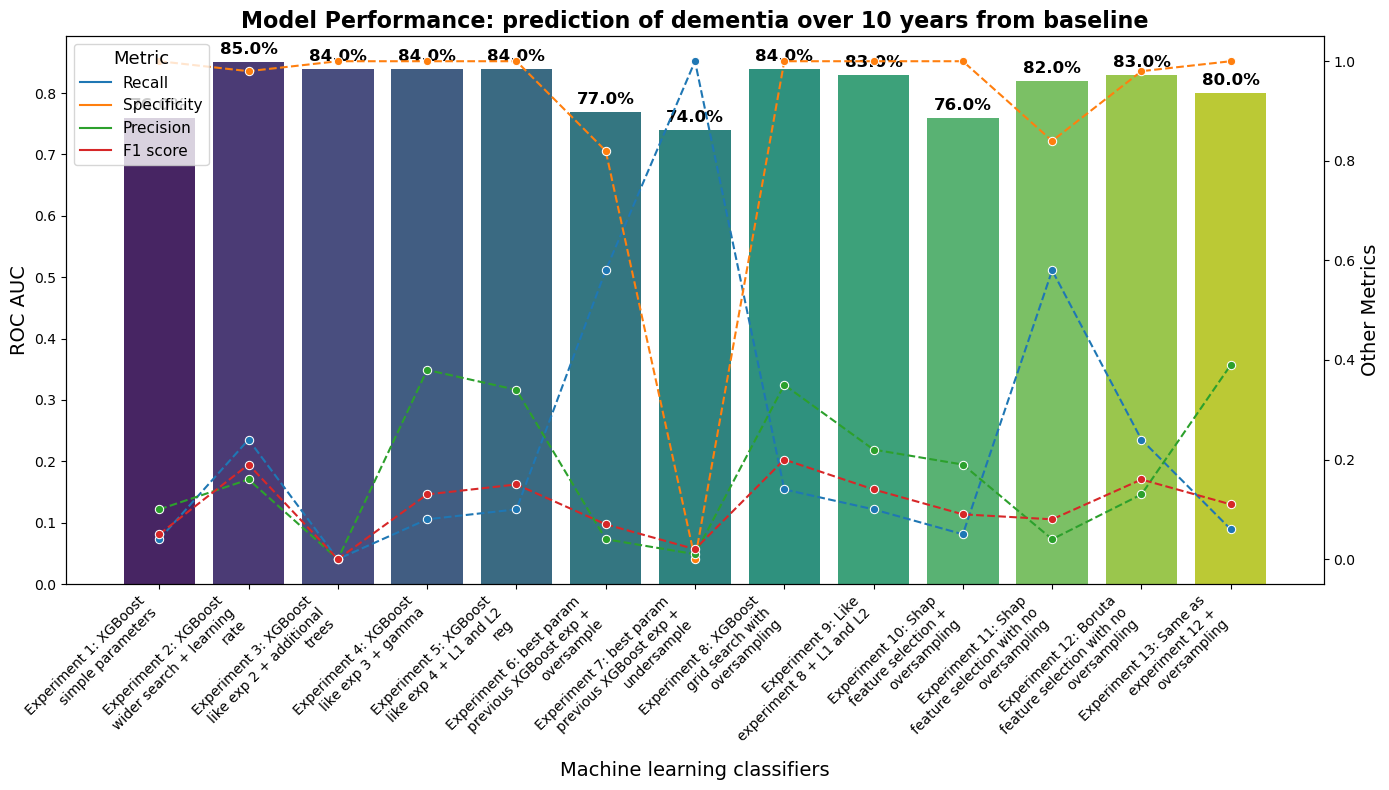

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data
data = {
    "Metric": ["ROC AUC", "Recall", "Specificity", "Precision", "F1 score"],
    "Experiment 1: XGBoost simple parameters": [0.76, 0.04, 1, 0.1, 0.05],
    "Experiment 2: XGBoost wider search + learning rate": [0.85, 0.24, 0.98, 0.16, 0.19],
    "Experiment 3: XGBoost like exp 2 + additional trees": [0.84, 0, 1, 0, 0],
    "Experiment 4: XGBoost like exp 3 + gamma": [0.84, 0.08, 1, 0.38, 0.13],
    "Experiment 5: XGBoost like exp 4 + L1 and L2 reg": [0.84, 0.1, 1, 0.34, 0.15],
    "Experiment 6: best param previous XGBoost exp + oversample": [0.77, 0.58, 0.82, 0.04, 0.07],
    "Experiment 7: best param previous XGBoost exp + undersample": [0.74, 1, 0, 0.01, 0.02],
    "Experiment 8: XGBoost grid search with oversampling": [0.84, 0.14, 1, 0.35, 0.2],
    "Experiment 9: Like experiment 8 + L1 and L2": [0.83, 0.1, 1, 0.22, 0.14],
    "Experiment 10: Shap feature selection + oversampling": [0.76, 0.05, 1, 0.19, 0.09],
    "Experiment 11: Shap feature selection with no oversampling": [0.82, 0.58, 0.84, 0.04, 0.08],
    "Experiment 12: Boruta feature selection with no oversampling": [0.83, 0.24, 0.98, 0.13, 0.16],
    "Experiment 13: Same as experiment 12 + oversampling ": [0.8, 0.06, 1, 0.39, 0.11]
}


# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

# Separate data for bar and line plots
df_bar = df_melted[df_melted['Metric'] == 'ROC AUC']
df_line = df_melted[df_melted['Metric'].isin(['Recall', 'Specificity', 'Precision', 'F1 score'])]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar for ROC AUC
bar_plot = sns.barplot(data=df_bar, x="Model", y="Value", ax=ax1, palette="viridis")

# Annotate bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Create second y-axis for line plot
ax2 = ax1.twinx()

# Plot line for Recall, Specificity, and F1 score
sns.lineplot(data=df_line, x="Model", y="Value", hue="Metric", marker='o', ax=ax2, linestyle='--')

# Add titles and labels
ax1.set_title("Model Performance: prediction of dementia over 10 years from baseline", fontsize=16, fontweight='bold')
ax1.set_xlabel("Machine learning classifiers", fontsize=14)
ax1.set_ylabel("ROC AUC", fontsize=14)
ax2.set_ylabel("Other Metrics", fontsize=14)

# Wrap x-axis labels for better readability
labels = [textwrap.fill(label.get_text(), 25) for label in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Customize legend
ax2.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### - Predicting dementia over 10 years from baseline (no age and no apoe4 alleles)

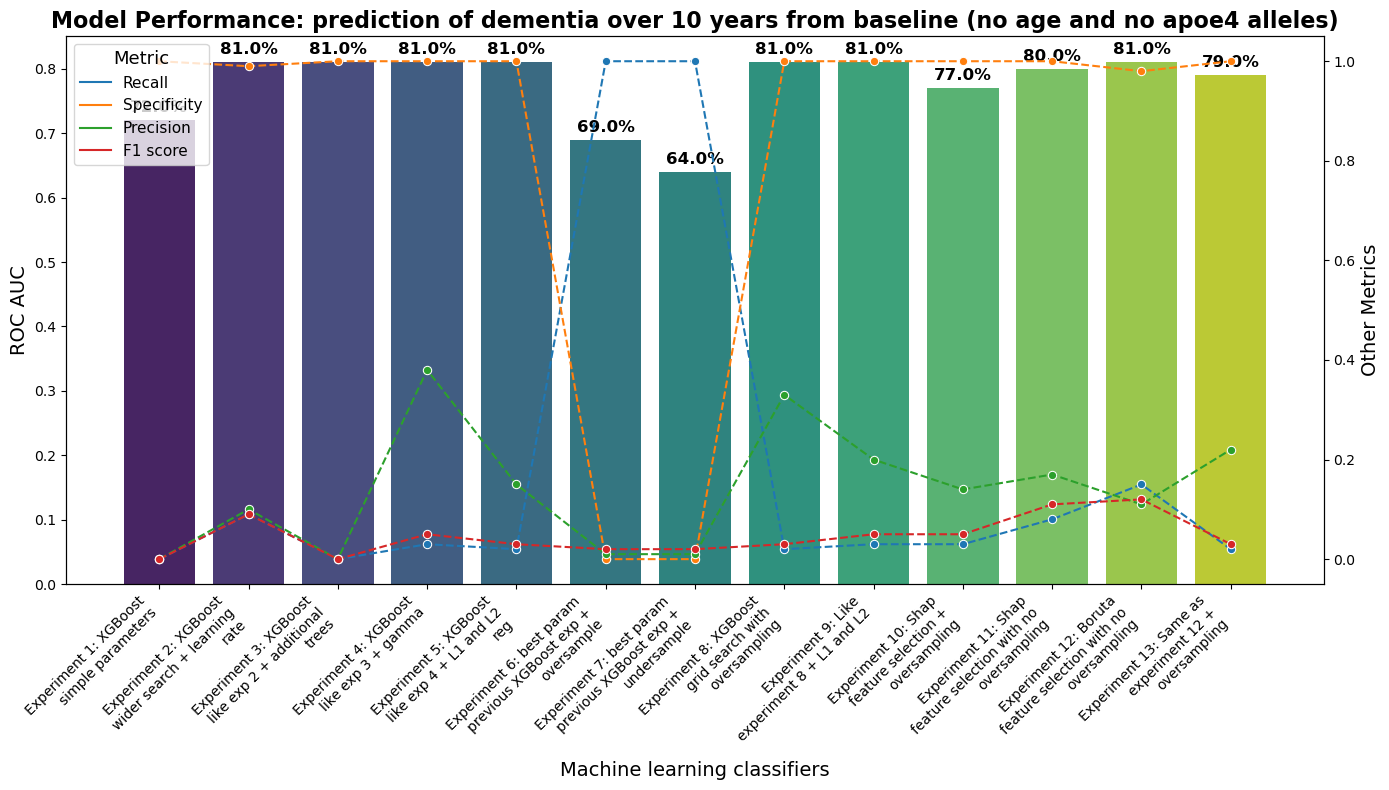

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data
data = {
    "Metric": ["ROC AUC", "Recall", "Specificity", "Precision", "F1 score"],
    "Experiment 1: XGBoost simple parameters": [0.72, 0, 1, 0, 0],
    "Experiment 2: XGBoost wider search + learning rate": [0.81, 0.09, 0.99, 0.1, 0.09],
    "Experiment 3: XGBoost like exp 2 + additional trees": [0.81, 0, 1, 0, 0],
    "Experiment 4: XGBoost like exp 3 + gamma": [0.81, 0.03, 1, 0.38, 0.05],
    "Experiment 5: XGBoost like exp 4 + L1 and L2 reg": [0.81, 0.02, 1, 0.15, 0.03],
    "Experiment 6: best param previous XGBoost exp + oversample": [0.69, 1, 0, 0.01, 0.02],
    "Experiment 7: best param previous XGBoost exp + undersample": [0.64, 1, 0, 0.01, 0.02],
    "Experiment 8: XGBoost grid search with oversampling": [0.81, 0.02, 1, 0.33, 0.03],
    "Experiment 9: Like experiment 8 + L1 and L2": [0.81, 0.03, 1, 0.2, 0.05],
    "Experiment 10: Shap feature selection + oversampling": [0.77, 0.03, 1, 0.14, 0.05],
    "Experiment 11: Shap feature selection with no oversampling": [0.8, 0.08, 1, 0.17, 0.11],
    "Experiment 12: Boruta feature selection with no oversampling": [0.81, 0.15, 0.98, 0.11, 0.12],
    "Experiment 13: Same as experiment 12 + oversampling ": [0.79, 0.02, 1, 0.22, 0.03]
}


# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

# Separate data for bar and line plots
df_bar = df_melted[df_melted['Metric'] == 'ROC AUC']
df_line = df_melted[df_melted['Metric'].isin(['Recall', 'Specificity', 'Precision', 'F1 score'])]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar for ROC AUC
bar_plot = sns.barplot(data=df_bar, x="Model", y="Value", ax=ax1, palette="viridis")

# Annotate bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Create second y-axis for line plot
ax2 = ax1.twinx()

# Plot line for Recall, Specificity, and F1 score
sns.lineplot(data=df_line, x="Model", y="Value", hue="Metric", marker='o', ax=ax2, linestyle='--')

# Add titles and labels
ax1.set_title("Model Performance: prediction of dementia over 10 years from baseline (no age and no apoe4 alleles)", fontsize=16, fontweight='bold')
ax1.set_xlabel("Machine learning classifiers", fontsize=14)
ax1.set_ylabel("ROC AUC", fontsize=14)
ax2.set_ylabel("Other Metrics", fontsize=14)

# Wrap x-axis labels for better readability
labels = [textwrap.fill(label.get_text(), 25) for label in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Customize legend
ax2.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
